In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/PokemonGO/pokemonGO.csv")
data.head(5)

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


In [3]:
rows,cols = data.shape
print('Number of Pokemons:',rows)
print('Number of Columns:',cols)

Number of Pokemons: 151
Number of Columns: 7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokemon No.  151 non-null    int64 
 1   Name         151 non-null    object
 2   Type 1       151 non-null    object
 3   Type 2       67 non-null     object
 4   Max CP       151 non-null    int64 
 5   Max HP       151 non-null    int64 
 6   Image URL    151 non-null    object
dtypes: int64(3), object(4)
memory usage: 8.4+ KB


In [5]:
data.describe()

,Pokemon No.,Max CP,Max HP
count,151.000000,151.000000,151.000000
mean,76.000000,1637.291391,113.350993
std,43.734045,755.261726,45.297417
min,1.000000,264.000000,27.000000
25%,38.500000,1001.500000,83.000000
50%,76.000000,1594.000000,107.000000
75%,113.500000,2170.500000,138.000000
max,151.000000,4174.000000,408.000000


In [6]:
print(*data.columns,sep=',')

Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL


In [7]:
d1 = list(data['Type 1'].unique())
d2 = list(data['Type 2'].unique())
d = list(set(d1) | set(d2))
d = d[1:]

print(*d,sep=', ')
print("Number of Pokemon Types:",len(d))

Normal, Water, Flying, Ghost, Psychic, Dragon, Electric, Bug, Steel, Grass, Rock, Ground, Fire, Poison, Fighting, Ice, Fairy
Number of Pokemon Types: 17


In [8]:
counter = {}
for j in d:
    counter[j]=0
    for i in range(0,rows):
        type1 = data.iloc[i,2]
        type2 = data.iloc[i,3]
        if(type1==j):
            counter[j]+=1
        if(type2==j):
            counter[j]+=1
for key in counter:
    print(key,":",counter[key])

Normal : 22
Water : 32
Flying : 19
Ghost : 3
Psychic : 14
Dragon : 3
Electric : 9
Bug : 12
Steel : 2
Grass : 14
Rock : 11
Ground : 14
Fire : 12
Poison : 33
Fighting : 8
Ice : 5
Fairy : 5


In [9]:
cp = max(data['Max CP'])
pokemon_cp = data.iloc[data['Max CP'].idxmax(),1]
print('Maximum of Max CP:',cp)
print(pokemon_cp)

hp = max(data['Max HP'])
pokemon_hp = data.iloc[data['Max HP'].idxmax(),1]
print('\nMaximum of Max HP:',hp)
print(pokemon_hp)

Maximum of Max CP: 4174
Mewtwo

Maximum of Max HP: 408
Chansey


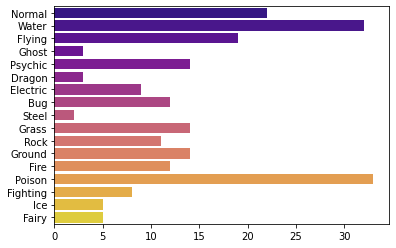

In [10]:
types = list(counter.keys())
counts = list(counter.values())
sns.barplot(y = types,x = counts,palette = 'plasma')
plt.show()

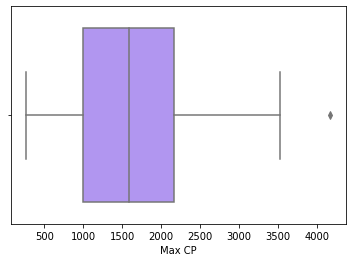

In [11]:
sns.boxplot(x = data['Max CP'],color = '#AB87FF')
plt.show()

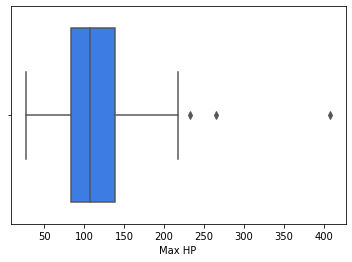

In [12]:
sns.boxplot(x = data['Max HP'],color = '#2176FF')
plt.show()

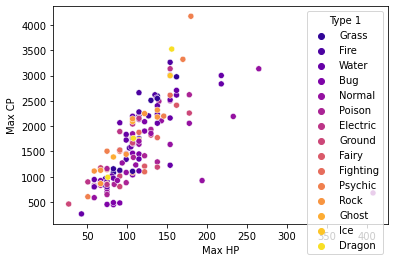

In [13]:
sns.scatterplot(data = data,x = 'Max HP',y = 'Max CP',hue = 'Type 1',palette = 'plasma')
plt.show()

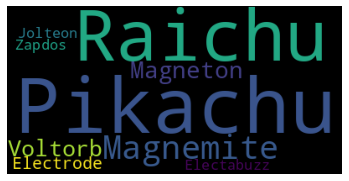

In [14]:
from wordcloud import WordCloud
txt = data[data['Type 1'] == 'Electric']
txt = ' '.join(txt['Name'])
cloud = WordCloud().generate(str(txt))
plt.imshow(cloud)
plt.axis("off")
plt.show()